https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920


https://radimrehurek.com/gensim/auto_examples/core/run_topics_and_transformations.html

In [67]:
import nltk
nltk.download('stopwords')

import gensim
from gensim import corpora, models

from pprint import pprint


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import pandas as pd

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]

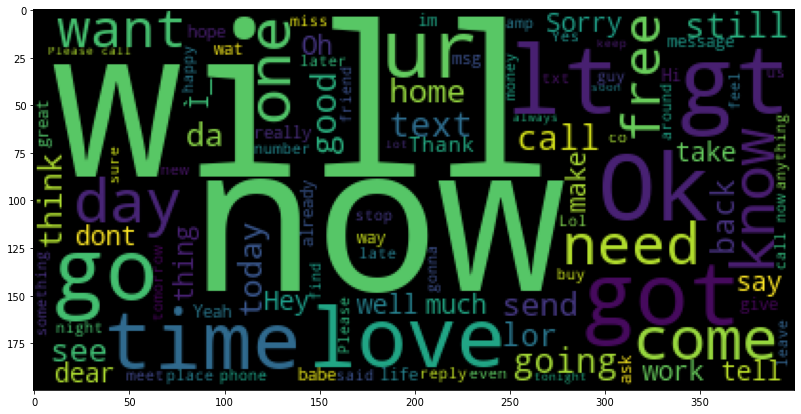

In [71]:
#word cloud visualization for the text
from wordcloud import WordCloud #visualization techniques for #frequently repeated texts
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )

wc.generate(' '.join(messages['text']))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

In [72]:

documents = messages['text'].tolist()

# remove common words and tokenize
texts = [
    [word for word in document.lower().split() if word not in stopwords]
    for document in documents
]



dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [73]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1)],
 [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)],
 [(22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(20, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)],
 [(50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)],
 [(57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1)],
 [(65, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1)],
 [(83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1),
  (92, 1),
  (93, 1

In [74]:
tfidf = models.TfidfModel(corpus)

corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

Streaming output truncated to the last 5000 lines.
[(1030, 0.5657119835188482), (2895, 0.824602905466122)]
[(625, 0.6018837159440072), (2290, 0.7985837416836342)]
[(148, 0.2339715620141303), (625, 0.3464111375560204), (2891, 0.43196708941356926), (2896, 0.6365943447185946), (2897, 0.48312390323982557)]
[(660, 0.2539612907728083), (708, 0.3445884092374066), (2898, 0.45101443867145247), (2899, 0.45101443867145247), (2900, 0.4904250682511813), (2901, 0.41160380909172367)]
[(135, 0.15867305111357566), (143, 0.19759251264830943), (173, 0.250730332587346), (298, 0.2002641450788652), (1027, 0.36101194979382323), (1613, 0.38137656465043207), (2088, 0.33071534458352486), (2902, 0.49247971726741235), (2903, 0.4529039757948845)]
[(148, 0.21973456774081648), (256, 0.39021551509982055), (257, 0.3475752864684178), (318, 0.3226660743717956), (931, 0.3281051604149113), (2891, 0.40568221562249884), (2904, 0.5498140957066816)]
[(101, 0.19396981051910217), (124, 0.1894035129756913), (296, 0.1868573022533

In [75]:
lda_model = gensim.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [76]:
#explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.003*"u" + 0.003*"call" + 0.002*"hi" + 0.002*"going" + 0.002*"get" + 0.002*"dear" + 0.002*"one" + 0.002*"2" + 0.002*"take" + 0.002*"free"


Topic: 1 
Words: 0.004*"good" + 0.003*"u" + 0.003*"like" + 0.002*"got" + 0.002*"going" + 0.002*"time" + 0.002*"you?" + 0.002*"ok." + 0.002*"i'm" + 0.002*"call"


Topic: 2 
Words: 0.006*"u" + 0.004*"ok..." + 0.003*"home" + 0.003*"." + 0.003*"2" + 0.003*"i'm" + 0.003*"get" + 0.002*"still" + 0.002*"ur" + 0.002*"got"


Topic: 3 
Words: 0.003*"going" + 0.003*"u" + 0.002*"2" + 0.002*"get" + 0.002*"send" + 0.002*"went" + 0.002*"i'm" + 0.002*"ur" + 0.002*"&lt;#&gt;" + 0.002*"late."


Topic: 4 
Words: 0.004*"u" + 0.003*"call" + 0.002*"know" + 0.002*"want" + 0.002*"..." + 0.002*"&lt;#&gt;" + 0.002*"get" + 0.002*"i'm" + 0.002*"c" + 0.002*"ì_"


Topic: 5 
Words: 0.004*"ok" + 0.004*"i'm" + 0.003*"u" + 0.002*"call" + 0.002*"?" + 0.002*"&lt;#&gt;" + 0.002*"get" + 0.002*"back" + 0.002*"gonna" + 0.002*"know"


Topic: 6 
Words: 0.004*"come" + 0.003

In [78]:
top_topics = lda_model.top_topics(corpus_tfidf)
num_topics = 10
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -6.1010.
[([(0.0043438673, 'come'),
   (0.003205761, 'tomorrow'),
   (0.0029611394, 'u'),
   (0.0023272485, 'see'),
   (0.0022387062, "i'll"),
   (0.0021743083, 'got'),
   (0.0021105362, "i'm"),
   (0.0020966334, 'call'),
   (0.0020802303, 'get'),
   (0.0018271862, '&lt;#&gt;'),
   (0.0017939201, 'time'),
   (0.001740044, 'text'),
   (0.0017089142, 'want'),
   (0.0016353718, 'go'),
   (0.0016201441, '.'),
   (0.0015670198, 'oh'),
   (0.0014715858, 'ur'),
   (0.0014428735, 'later'),
   (0.0014309908, 'came'),
   (0.0013787394, 'love')],
  -4.833537186211628),
 ([(0.002839594, 'going'),
   (0.0026526586, 'u'),
   (0.0022085675, '2'),
   (0.00219826, 'get'),
   (0.0018935723, 'send'),
   (0.0018348554, 'went'),
   (0.001827994, "i'm"),
   (0.0018264465, 'ur'),
   (0.0017400506, '&lt;#&gt;'),
   (0.0016471181, 'late.'),
   (0.00164007, 'need'),
   (0.0016270726, 'love'),
   (0.0016249894, '?'),
   (0.0015742895, 'go'),
   (0.0015724078, '...'),
   (0.0015209675, 'l

In [79]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_tfidf))  
# a measure of how good the model is. lower the better.


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -11.588344573496073


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [80]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.046259  0.039796       1        1  11.567903
9     -0.003528  0.044699       2        1  10.790497
7      0.079293 -0.005608       3        1  10.645402
8      0.022582 -0.022803       4        1  10.492583
1     -0.038203 -0.075924       5        1  10.425619
3      0.010891  0.002745       6        1   9.978851
0     -0.018009  0.003133       7        1   9.521752
4     -0.016075 -0.001174       8        1   9.354285
6      0.003787  0.010530       9        1   8.784991
5      0.005522  0.004608      10        1   8.438115, topic_info=          Term       Freq      Total Category  logprob  loglift
524     sorry,  15.000000  15.000000  Default  30.0000  30.0000
522      later  19.000000  19.000000  Default  29.0000  29.0000
1068     ok...  10.000000  10.000000  Default  28.0000  28.0000
298       i'll  25.000000  25.000000  Default  27.0000  27.0000
409   tomorrow   9.000000   9.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
128          r   1.611485  14.612449  Topic10  -6.6996   0.2677
545       come   1.643051  24.352156  Topic10  -6.6802  -0.2237
347     please   1.581369  14.387720  Topic10  -6.7185   0.2643
54       think   1.512773  14.535495  Topic10  -6.7629   0.2098
244      going   1.488608  18.514034  Topic10  -6.7790  -0.0483

[759 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
10625      6  0.753761         %.
412        1  0.079042  &lt;#&gt;
412        2  0.158084  &lt;#&gt;
412        3  0.079042  &lt;#&gt;
412        4  0.079042  &lt;#&gt;
...      ...       ...        ...
931        3  0.109270         ìï
931        5  0.109270         ìï
931        6  0.109270         ìï
931        9  0.109270         ìï
931       10  0.109270         ìï

[1476 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 8, 9, 2, 4, 1, 5, 7, 6])